# CS 3500 - Starter Notebook 📒

In [1]:
# Check current version of Jupyter
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.30.0
ipykernel        : 6.29.5
ipywidgets       : 8.1.5
jupyter_client   : 8.6.3
jupyter_core     : 5.7.2
jupyter_server   : 2.15.0
jupyterlab       : 4.3.4
nbclient         : 0.10.2
nbconvert        : 7.16.6
nbformat         : 5.10.4
notebook         : 7.3.2
qtconsole        : 5.6.1
traitlets        : 5.14.3


In [2]:
# Here several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from datetime import datetime, timedelta

In [3]:
#importing libraries
import numpy as np
import regex
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

## Read Data Set and Look at  Metadata

In [4]:
#reading the CSV file into dataframe df
# Data should be located in the same folder as the notebook for this to work
df = pd.read_csv('../Data/LA_Crime_Data_2023_to_Present_data.csv') 

In [5]:
# print shape of dataframe
print(df.shape)

(390088, 21)


In [6]:
# print basic info about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390088 entries, 0 to 390087
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      390088 non-null  int64  
 1   DR_NO           390088 non-null  int64  
 2   Date Rptd       390088 non-null  object 
 3   DATE OCC        390088 non-null  object 
 4   TIME OCC        390088 non-null  int64  
 5   AREA            390088 non-null  int64  
 6   AREA NAME       390088 non-null  object 
 7   Rpt Dist No     390088 non-null  int64  
 8   Part 1-2        390088 non-null  int64  
 9   Crm Cd          390088 non-null  int64  
 10  Crm Cd Desc     390088 non-null  object 
 11  Mocodes         319764 non-null  object 
 12  Vict Age        390088 non-null  int64  
 13  Vict Sex        322491 non-null  object 
 14  Vict Descent    322483 non-null  object 
 15  Premis Cd       390077 non-null  float64
 16  Premis Desc     389790 non-null  object 
 17  Weapon Use

In [7]:
# print first 5 records of the dataframe
df.head()

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc
0,644971,230611294,06/17/2023 12:00:00 AM,2023-06-17,1140,6,Hollywood,668,1,442,...,1822 0325 2004,0,X,X,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont
1,644972,230106843,02/12/2023 12:00:00 AM,2023-02-11,1630,1,Central,191,1,440,...,0913 0344 0603,48,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,644973,231515059,09/19/2023 12:00:00 AM,2023-09-19,1030,15,N Hollywood,1549,1,230,...,1309 0421 0913 0334,36,F,W,101.0,STREET,102.0,HAND GUN,IC,Invest Cont
3,644974,230110347,04/11/2023 12:00:00 AM,2023-04-10,816,1,Central,192,1,331,...,0344 1822,25,F,H,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,644975,230618504,12/01/2023 12:00:00 AM,2023-12-01,110,6,Hollywood,639,2,626,...,1202 1814 0913 0319 2001 1813 2000 0400 0448,65,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other


In [8]:
# Set column 'DR_NO' Index
df = df.set_index('DR_NO')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390088 entries, 230611294 to 241515289
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      390088 non-null  int64  
 1   Date Rptd       390088 non-null  object 
 2   DATE OCC        390088 non-null  object 
 3   TIME OCC        390088 non-null  int64  
 4   AREA            390088 non-null  int64  
 5   AREA NAME       390088 non-null  object 
 6   Rpt Dist No     390088 non-null  int64  
 7   Part 1-2        390088 non-null  int64  
 8   Crm Cd          390088 non-null  int64  
 9   Crm Cd Desc     390088 non-null  object 
 10  Mocodes         319764 non-null  object 
 11  Vict Age        390088 non-null  int64  
 12  Vict Sex        322491 non-null  object 
 13  Vict Descent    322483 non-null  object 
 14  Premis Cd       390077 non-null  float64
 15  Premis Desc     389790 non-null  object 
 16  Weapon Used Cd  108059 non-null  float64
 17  Weap

In [9]:
# Drop uneccesary columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Checking dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390088 entries, 230611294 to 241515289
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date Rptd       390088 non-null  object 
 1   DATE OCC        390088 non-null  object 
 2   TIME OCC        390088 non-null  int64  
 3   AREA            390088 non-null  int64  
 4   AREA NAME       390088 non-null  object 
 5   Rpt Dist No     390088 non-null  int64  
 6   Part 1-2        390088 non-null  int64  
 7   Crm Cd          390088 non-null  int64  
 8   Crm Cd Desc     390088 non-null  object 
 9   Mocodes         319764 non-null  object 
 10  Vict Age        390088 non-null  int64  
 11  Vict Sex        322491 non-null  object 
 12  Vict Descent    322483 non-null  object 
 13  Premis Cd       390077 non-null  float64
 14  Premis Desc     389790 non-null  object 
 15  Weapon Used Cd  108059 non-null  float64
 16  Weapon Desc     108059 non-null  object 
 17  Stat

In [10]:
# Convert the columns to a suitable data type
df['Date Rptd'] = df['Date Rptd'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))
df['DATE OCC'] = df['DATE OCC'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df['AREA NAME'] = df['AREA NAME'].astype('string')
df['Crm Cd Desc'] = df['Crm Cd Desc'].astype('string')
df['Mocodes'] = df['Mocodes'].astype('string')
df['Vict Sex'] = df['Vict Sex'].astype('string')
df['Vict Descent'] = df['Vict Descent'].astype('string')
df['Premis Desc'] = df['Premis Desc'].astype('string')
df['Weapon Desc'] = df['Weapon Desc'].astype('string')
df['Status'] = df['Status'].astype('string')
df['Status Desc'] = df['Status Desc'].astype('string')

# Checking dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390088 entries, 230611294 to 241515289
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date Rptd       390088 non-null  datetime64[ns]
 1   DATE OCC        390088 non-null  datetime64[ns]
 2   TIME OCC        390088 non-null  int64         
 3   AREA            390088 non-null  int64         
 4   AREA NAME       390088 non-null  string        
 5   Rpt Dist No     390088 non-null  int64         
 6   Part 1-2        390088 non-null  int64         
 7   Crm Cd          390088 non-null  int64         
 8   Crm Cd Desc     390088 non-null  string        
 9   Mocodes         319764 non-null  string        
 10  Vict Age        390088 non-null  int64         
 11  Vict Sex        322491 non-null  string        
 12  Vict Descent    322483 non-null  string        
 13  Premis Cd       390077 non-null  float64       
 14  Premis Desc     389790 non-nul

In [11]:
# Map Target Column

# Mapping dictionary
mapping = {
            'IC': 'No Arrest'
            ,'AA': 'Arrest'
            ,'AO': 'No Arrest'
            ,'JO': 'No Arrest'
            ,'JA': 'Arrest'
            ,'CC': 'No Arrest'
}
# Create target variable based in the status variable 
df['Target'] = df['Status'].map(mapping)

# Checking dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 390088 entries, 230611294 to 241515289
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date Rptd       390088 non-null  datetime64[ns]
 1   DATE OCC        390088 non-null  datetime64[ns]
 2   TIME OCC        390088 non-null  int64         
 3   AREA            390088 non-null  int64         
 4   AREA NAME       390088 non-null  string        
 5   Rpt Dist No     390088 non-null  int64         
 6   Part 1-2        390088 non-null  int64         
 7   Crm Cd          390088 non-null  int64         
 8   Crm Cd Desc     390088 non-null  string        
 9   Mocodes         319764 non-null  string        
 10  Vict Age        390088 non-null  int64         
 11  Vict Sex        322491 non-null  string        
 12  Vict Descent    322483 non-null  string        
 13  Premis Cd       390077 non-null  float64       
 14  Premis Desc     389790 non-nul

In [12]:
# Count values in 'col1'
value_counts = df['Target'].value_counts()
print(value_counts)

Target
No Arrest    360535
Arrest        29551
Name: count, dtype: int64


##### Look at "TIME OCC" data

In [13]:
# Look at time data
df.loc[: ,'TIME OCC'].head(10)

DR_NO
230611294    1140
230106843    1630
231515059    1030
230110347     816
230618504     110
242105761     730
230617683     800
230511288      20
231012230    1200
230514872    1520
Name: TIME OCC, dtype: int64

TIME OCC column is not in the right format and there are few Discripencies(Like 30, 40 as shown below and inserting ':' to correctly represent in the format HH:MM )

Changing 30 to 00:30
Correcting the Format of the ones that are meaningful - 1200 to 12:00

In [14]:
# Change data type
df['TIME OCC'] = df['TIME OCC'].astype('string')

# Pad the 'TIME OCC' column values with leading zeros to ensure a 4-digit format
df['TIME OCC'] = df['TIME OCC'].str.zfill(4)

# Format the 'TIME OCC' column as 'HH:MM' (hour:minute)
df['TIME OCC'] = df['TIME OCC'].str[:-2] + ':' + df['TIME OCC'].str[-2:]


In [15]:
# Change data type
df['TIME OCC'] = df['TIME OCC'].astype('string')

# Print the firt 10 rows of the column
df.loc[: ,'TIME OCC'].head(10)

DR_NO
230611294    11:40
230106843    16:30
231515059    10:30
230110347    08:16
230618504    01:10
242105761    07:30
230617683    08:00
230511288    00:20
231012230    12:00
230514872    15:20
Name: TIME OCC, dtype: string

In [16]:
# write data to see dataset
df.to_csv('df.csv', index=False)

## Classify Data 🔎 

In [17]:
# List columns
df.columns

Index(['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Premis Desc', 'Weapon Used Cd',
       'Weapon Desc', 'Status', 'Status Desc', 'Target'],
      dtype='object')

In [18]:
# Select some features, you can add or take out some.
col_target = ['Target']
cols_numerical = ['AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Vict Age', 'Premis Cd', 'Weapon Used Cd'] 
cols_categorical = ['TIME OCC', 'AREA NAME', 'Crm Cd Desc', 'Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc']
cols_datetime = ['Date Rptd', 'DATE OCC']

#Dropping AREA as both 'AREA' and 'AREA NAME' represent the same.
cols_other = ['Status', 'Status Desc']

## Check for Duplicates 🧐

In [19]:
# Get total count of duplicated rows
df.duplicated().sum()

np.int64(31552)

In [20]:
# Find all duplicates
duplicates = df[df.duplicated(keep=False)]

# write duplicated rows
duplicates.to_csv('Duplciated rows.csv', index=False)

In [21]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check for duplicates
df.duplicated().sum()

np.int64(0)

## Look At Summary Data  📜

In [22]:
# General stats for variables
df.describe()

,Date Rptd,DATE OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd
count,358536,358536,358536.000000,358536.000000,358536.000000,358536.000000,358536.000000,358528.000000,102206.000000
mean,2023-10-31 21:33:50.497356288,2023-10-24 15:20:38.878104320,10.617810,1108.423938,1.367324,497.752337,26.976083,306.635683,367.874587
min,2023-01-01 00:00:00,2023-01-01 00:00:00,1.000000,101.000000,1.000000,110.000000,-1.000000,101.000000,101.000000
25%,2023-05-30 00:00:00,2023-05-22 00:00:00,5.000000,564.000000,1.000000,331.000000,0.000000,101.000000,312.000000
50%,2023-10-18 00:00:00,2023-10-10 00:00:00,11.000000,1132.000000,1.000000,442.000000,28.000000,203.000000,400.000000
75%,2024-03-09 00:00:00,2024-03-02 00:00:00,16.000000,1606.000000,2.000000,626.000000,43.000000,501.000000,400.000000
max,2025-01-29 00:00:00,2024-12-30 00:00:00,21.000000,2199.000000,2.000000,956.000000,99.000000,976.000000,516.000000
std,NaN,NaN,6.153013,615.675760,0.482077,199.698592,22.420129,224.120141,123.855012


## Check For Missing Values ⛔️

In [23]:
# get percentage of null values
total_count = len(df)

# loop each column
for column in df.columns:
    null_count = df[column].isnull().sum()
    null_percentage = round((null_count / total_count) * 100,1)
    print(f"Column '{column}': {null_percentage} % of null values")

Column 'Date Rptd': 0.0 % of null values
Column 'DATE OCC': 0.0 % of null values
Column 'TIME OCC': 0.0 % of null values
Column 'AREA': 0.0 % of null values
Column 'AREA NAME': 0.0 % of null values
Column 'Rpt Dist No': 0.0 % of null values
Column 'Part 1-2': 0.0 % of null values
Column 'Crm Cd': 0.0 % of null values
Column 'Crm Cd Desc': 0.0 % of null values
Column 'Mocodes': 17.5 % of null values
Column 'Vict Age': 0.0 % of null values
Column 'Vict Sex': 16.8 % of null values
Column 'Vict Descent': 16.8 % of null values
Column 'Premis Cd': 0.0 % of null values
Column 'Premis Desc': 0.1 % of null values
Column 'Weapon Used Cd': 71.5 % of null values
Column 'Weapon Desc': 71.5 % of null values
Column 'Status': 0.0 % of null values
Column 'Status Desc': 0.0 % of null values
Column 'Target': 0.0 % of null values


### Handle "Weapon Used Cd" ⛔️

In [24]:
# Fill missing values (NaN) in 'Weapon Used Cd' column with 0
df.loc[df['Weapon Used Cd'].isna(), 'Weapon Used Cd'] = 0

# Fill missing values (NaN) in 'Weapon Desc' column with 'No weapons identified'
df.loc[df['Weapon Desc'].isna(), 'Weapon Desc'] = 'No weapons identified'

In [25]:
# Filter the DataFrame 'df' to exclude rows where 'Vict Age' is either 0 or NaN
df = df[(df['Vict Age'] != 0) & (df['Vict Age'].notna())]
df.loc[:,'Vict Age'].head(10)

DR_NO
230106843    48
231515059    36
230110347    25
230618504    65
242105761    31
230617683    46
230511288    51
230514872    38
232005166    26
230107118    47
Name: Vict Age, dtype: int64

### Handle "Vict Sex" ⛔️

In [26]:
# Filter the DataFrame 'df' to exclude rows where 'Vict Sex' is 'X' (Unknown), 'H' (invalid), or NaN
df = df[(df['Vict Sex'] != 'X') & (df['Vict Sex'] != 'H')&(df['Vict Sex'].notna())]

df.loc[: ,'Vict Sex'].head(10)

DR_NO
230106843    M
231515059    F
230110347    F
230618504    F
242105761    F
230617683    M
230511288    M
230514872    F
232005166    M
230107118    F
Name: Vict Sex, dtype: string

In [27]:
print(df['Vict Descent'].unique())

<StringArray>
[ 'H',  'W',  'B',  'A',  'O',  'X',  'Z',  'K',  'C',  'F',  'I',  'J',  'P',
  'D',  'V',  'G',  'S',  'L',  'U',  '-', <NA>]
Length: 21, dtype: string


In [28]:
# Filter the DataFrame 'df' to exclude rows where 'Vict Descent' is '-' or missing (NaN)
df = df[(df['Vict Descent'] != '-') & (df['Vict Descent'].notna())]
df.loc[: ,'Vict Descent'].head(10)

DR_NO
230106843    H
231515059    W
230110347    H
230618504    W
242105761    H
230617683    H
230511288    H
230514872    H
232005166    H
230107118    B
Name: Vict Descent, dtype: string

In [29]:
# Print dataframe info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 240340 entries, 230106843 to 240309674
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date Rptd       240340 non-null  datetime64[ns]
 1   DATE OCC        240340 non-null  datetime64[ns]
 2   TIME OCC        240340 non-null  string        
 3   AREA            240340 non-null  int64         
 4   AREA NAME       240340 non-null  string        
 5   Rpt Dist No     240340 non-null  int64         
 6   Part 1-2        240340 non-null  int64         
 7   Crm Cd          240340 non-null  int64         
 8   Crm Cd Desc     240340 non-null  string        
 9   Mocodes         238357 non-null  string        
 10  Vict Age        240340 non-null  int64         
 11  Vict Sex        240340 non-null  string        
 12  Vict Descent    240340 non-null  string        
 13  Premis Cd       240339 non-null  float64       
 14  Premis Desc     240255 non-nul

In [30]:
# Drop rows with missing values (NaN) from the DataFrame 'df'
df = df.dropna()

In [31]:
print(df.shape)

(238273, 20)


## Visualize Data 📊


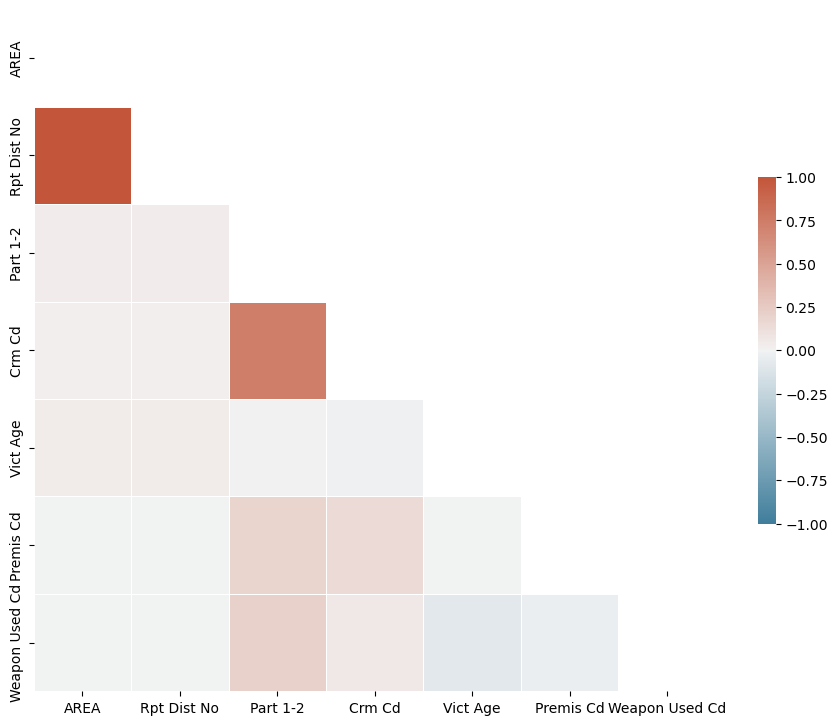

In [32]:
# Check cross-correlation of numerical columns (use a spearman method because it is highly likely relationships are non-linear)
df_corr = df[cols_numerical].corr(method='spearman')
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr,
            mask=np.triu(np.ones_like(df_corr, dtype=bool)), 
            cmap=sns.diverging_palette(230, 20, as_cmap=True), 
            vmin=-1.0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

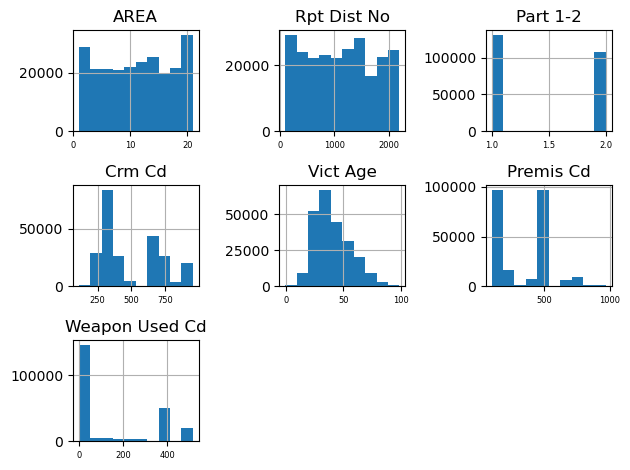

In [33]:
# Plot Histograms
df[cols_numerical].hist(xlabelsize =6)
plt.tight_layout()

<Axes: >

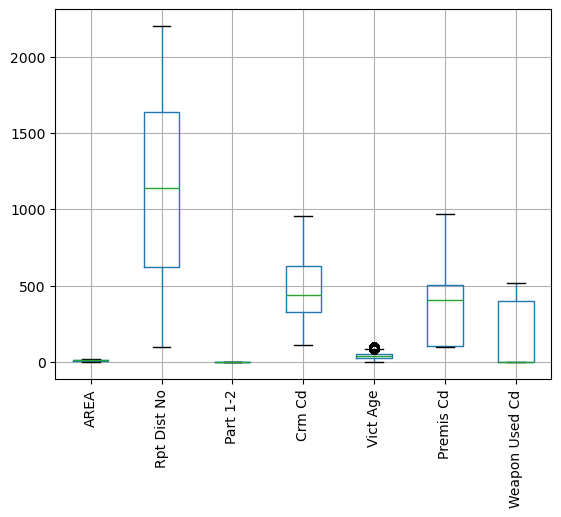

In [34]:
# Making Scattetrd Plots
df[cols_numerical].boxplot(rot=90)

## Identifying Ouliers 🔕

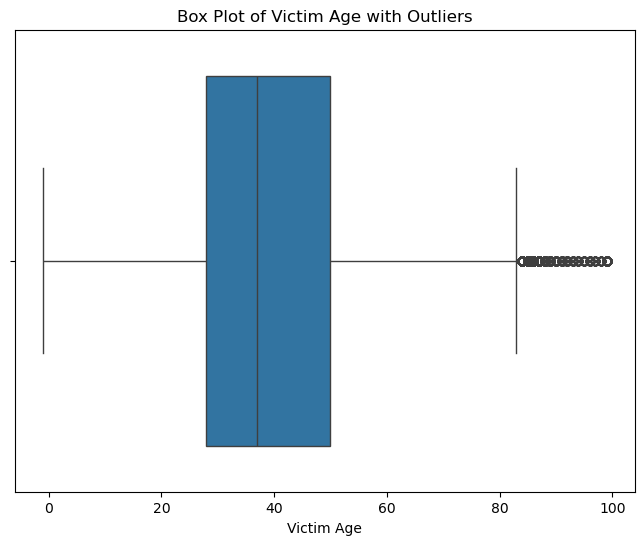

In [35]:
# Create a box plot for Victim Age
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Vict Age'])
plt.xlabel("Victim Age")
plt.title("Box Plot of Victim Age with Outliers")
plt.show()

# Note that the plot below do not represesnt all ouliers on the variable 
# since it is possible for that old people could have been victims of a crime.

## Analyzing Variables 📈

In [36]:
features_of_interest = ["Vict Age"]

# Making a nuberical summary
numerical_summary = df[features_of_interest].describe()
mode_age = df['Vict Age'].mode().values[0]
print(numerical_summary.loc[['mean', 'std']])
print(f"Mode of Victim Age: {mode_age}")

       Vict Age
mean  39.707650
std   15.582805
Mode of Victim Age: 30


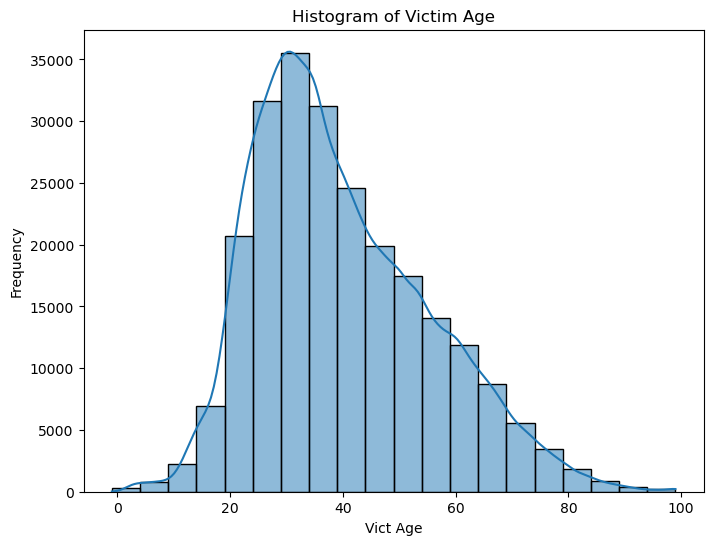

In [37]:
# Create a histogram to visualize the spread of Victim Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Vict Age'], bins=20, kde=True)
plt.xlabel("Vict Age")
plt.ylabel("Frequency")
plt.title("Histogram of Victim Age")
plt.show()

In [38]:
# Calculate the z-score for Victim Age
z_scores = np.abs((df['Vict Age'] - df['Vict Age'].mean()) / df['Vict Age'].std())

# Define a threshold (e.g., 3 standard deviations)
threshold = 3

# Identify potential outliers
potential_outliers = df[z_scores > threshold]

# Calculate the percentage of outliers
percentage_outliers = (len(potential_outliers) / len(df)) * 100

print(f"Percentage of Outliers in Victim Age: {percentage_outliers:.2f}%")

Percentage of Outliers in Victim Age: 0.37%


### Handle "Vict Sex" ⛔️

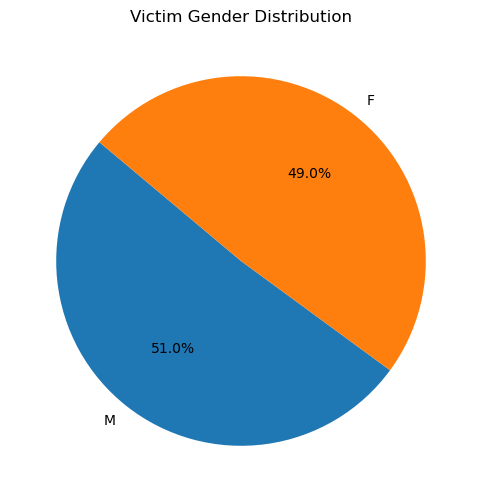

In [39]:
# Get the victim gender counts
victim_gender_counts = df['Vict Sex'].value_counts()

#create a pie chart of the victim gender counts
plt.figure(figsize=(6, 6))
plt.pie(victim_gender_counts, labels=victim_gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Victim Gender Distribution")
plt.show()

In [40]:
temp = df['Vict Sex'].unique() # Get the unique values in the 'Vict Sex' column of the DataFrame 'df'
print(temp) # Print the unique values in the 'Vict Sex' column
print(len(df['AREA NAME'].unique())) # Print the number of unique values in the 'AREA NAME' column of the DataFrame 'df'

<StringArray>
['M', 'F']
Length: 2, dtype: string
21


## Exploratory Data Analysis (EDA) 📈

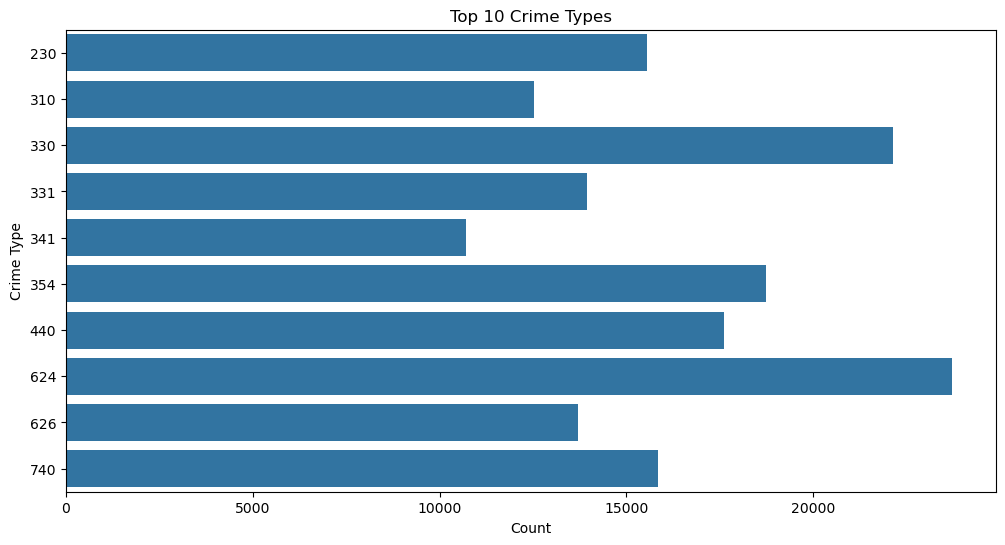

In [41]:
# Get the top 10 most frequent crime types and their counts from the 'Crm Cd' column
top_crime_types = df['Crm Cd'].value_counts().head(10)

# Create a new figure with a specified size (12 units wide and 6 units tall)
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot using Seaborn, where 'x' represents counts and 'y' represents crime types
sns.barplot(x=top_crime_types.values, y=top_crime_types.index, orient="h")

plt.title("Top 10 Crime Types")# Set the title of the plot
plt.xlabel("Count") # Label the x-axis
plt.ylabel("Crime Type") # Label the y-axis
plt.show() # Display the plot

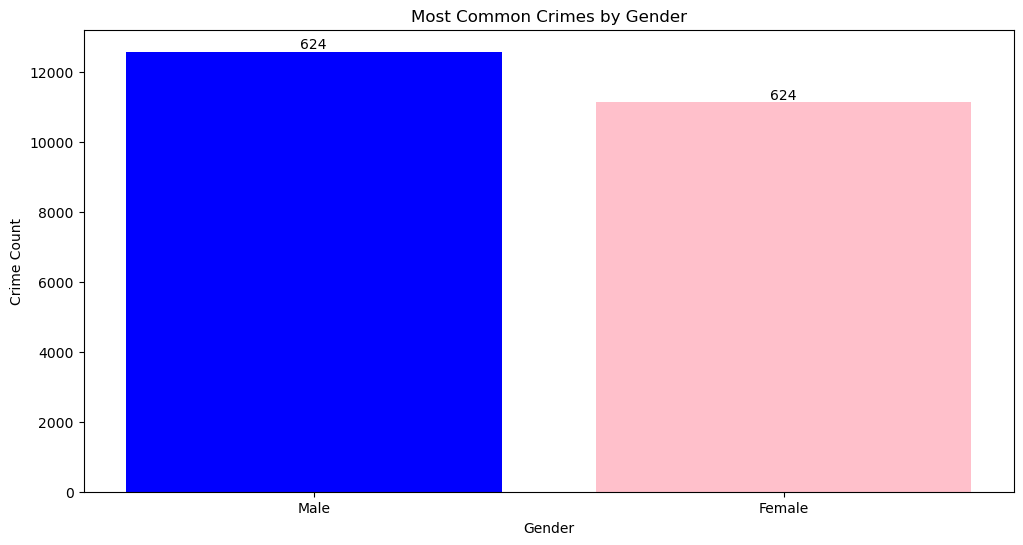

In [42]:
# Filter data for male victims
male_victims = df[df['Vict Sex'] == 'M']

# Filter data for female victims
female_victims = df[df['Vict Sex'] == 'F']

# Count the occurrences of each crime code description for males and females
male_crime_counts = male_victims['Crm Cd'].value_counts()
female_crime_counts = female_victims['Crm Cd'].value_counts()

# Get the most common crime for each gender
most_common_male_crime = male_crime_counts.idxmax()
most_common_female_crime = female_crime_counts.idxmax()

# Create a bar chart to show the most common crimes by gender
plt.figure(figsize=(12, 6))
plt.bar(['Male', 'Female'], [male_crime_counts[most_common_male_crime], female_crime_counts[most_common_female_crime]], color=['blue', 'pink'])
plt.title("Most Common Crimes by Gender")
plt.xlabel("Gender")
plt.ylabel("Crime Count")
plt.text(0, male_crime_counts[most_common_male_crime] , most_common_male_crime, ha='center', va='bottom')
plt.text(1, female_crime_counts[most_common_female_crime] , most_common_female_crime, ha='center', va='bottom')
plt.show()

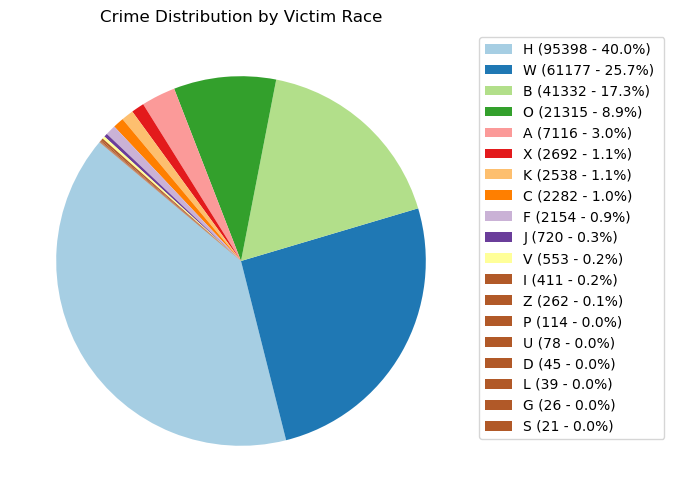

In [43]:
# Get the counts of victims by descent/race from the 'Vict Descent' column
victim_gender_counts = df['Vict Descent'].value_counts()

# Create a new figure with a specified size (12 units wide and 6 units tall)
plt.figure(figsize=(12, 6))

# Get the counts of victims by race
crime_counts_by_race = df['Vict Descent'].value_counts()

# Generate a range of colors using the 'Paired' colormap for the pie chart
colors = plt.cm.Paired(range(len(crime_counts_by_race)))

plt.pie(crime_counts_by_race, startangle=140, colors=colors) # Create a pie chart with crime counts by race, starting the angle at 140 degrees
plt.title("Crime Distribution by Victim Race") # Set the title of the pie chart

# Create a legend with colors and percentages
legend_labels = [f"{race} ({count} - {percentage:.1f}%) " for race, count, percentage in zip(crime_counts_by_race.index, crime_counts_by_race.values, (crime_counts_by_race / crime_counts_by_race.sum()) * 100)]
plt.legend(legend_labels, loc="best", bbox_to_anchor=(1, 1))

plt.show() #Display the plot

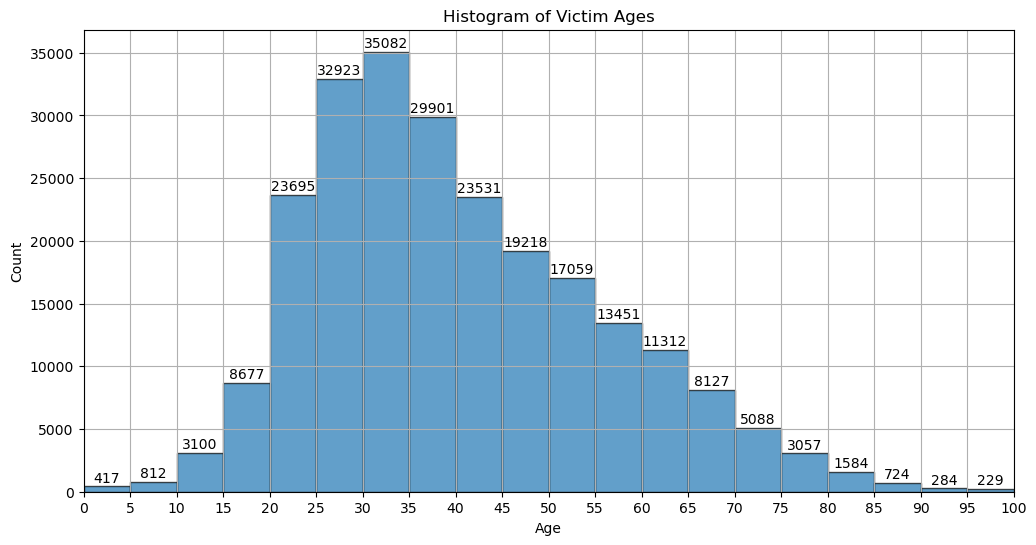

In [44]:
# Create a new figure with a specified size (12 units wide and 6 units tall)
plt.figure(figsize=(12, 6))

# Generate a histogram of victim ages with specified bins and styling
hist, bins, _ = plt.hist(df['Vict Age'], bins=np.arange(0, 101, 5), edgecolor='k', alpha=0.7)

# Set the title of the histogram
plt.title("Histogram of Victim Ages")

# Label the x-axis and y-axis
plt.xlabel("Age")
plt.ylabel("Count")

plt.grid(True) # Display the grid on the plot

# Add counts on top of each bar
for i in range(len(bins) - 1):
    plt.text(bins[i] + 2.5, hist[i] + 100, str(int(hist[i])), fontsize=10, ha='center', va='bottom')

plt.xticks(np.arange(0, 101, 5))  # Set X-axis ticks at 5-year intervals
plt.xlim(0, 100)  # Set X-axis limits
plt.show()

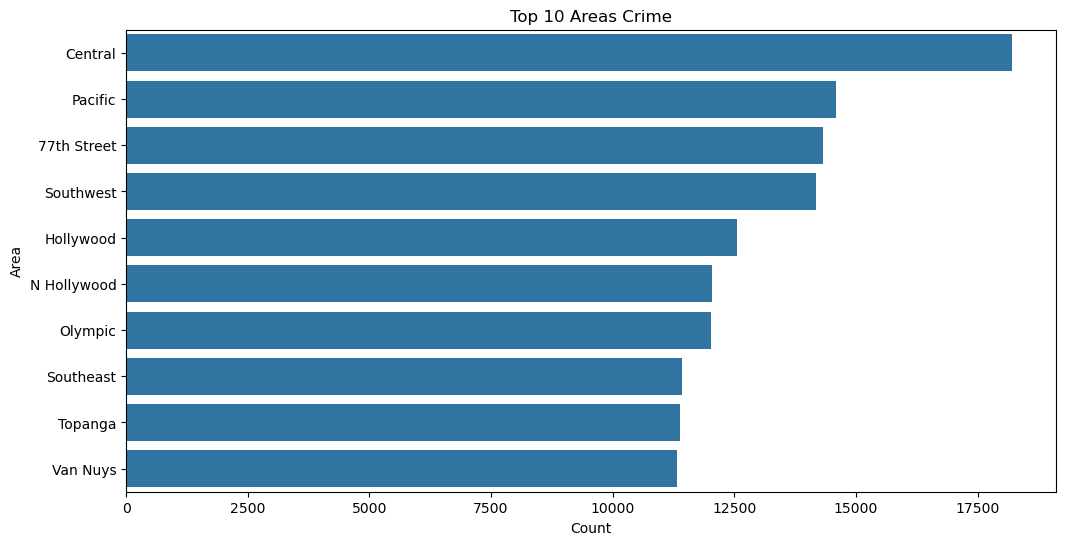

In [45]:
# Get the top 10 areas with the highest crime counts from the 'AREA NAME' column
top_crime_types = df['AREA NAME'].value_counts().head(10)

# Create a new figure with a specified size (12 units wide and 6 units tall)
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot using Seaborn, where 'x' represents counts and 'y' represents areas
sns.barplot(x=top_crime_types.values, y=top_crime_types.index, orient="h")

# Set the title and label the x-axis and y-axis
plt.title("Top 10 Areas Crime")
plt.xlabel("Count")
plt.ylabel("Area")

plt.show() # Display the plot

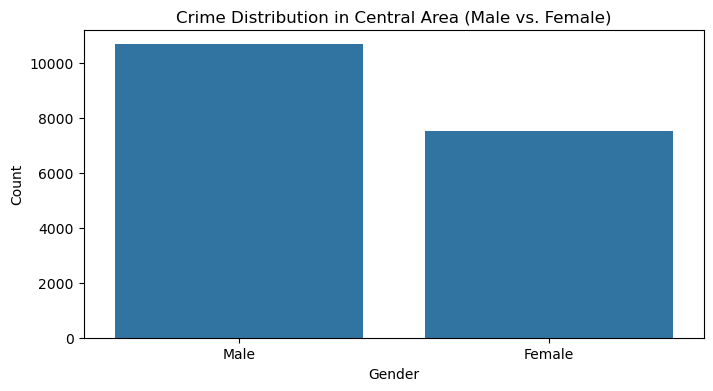

In [46]:
central_data = df[df['AREA NAME'] == 'Central']

# Calculate the count of male and female victims in the Central area
male_count = (central_data['Vict Sex'] == 'M').sum()
female_count = (central_data['Vict Sex'] == 'F').sum()

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=['Male', 'Female'], y=[male_count, female_count])
plt.title("Crime Distribution in Central Area (Male vs. Female)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

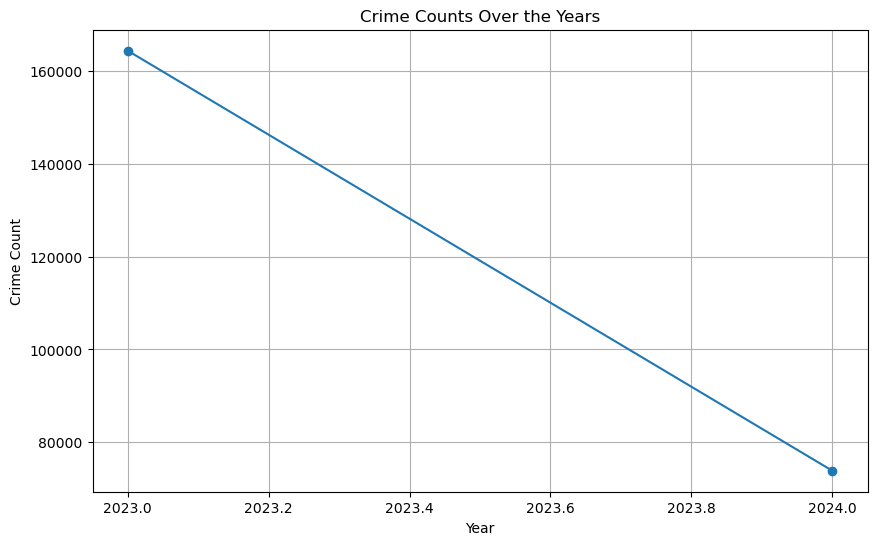

In [47]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Extract the year from the "Date Occurred" column and create a new column "Year"
df['Year'] = df['DATE OCC'].dt.year

# Count the number of crimes for each year
crime_counts_by_year = df['Year'].value_counts().sort_index()

# Create a line plot for crime counts over the years
plt.figure(figsize=(10, 6))
plt.plot(crime_counts_by_year.index, crime_counts_by_year.values, marker='o', linestyle='-')
plt.title("Crime Counts Over the Years")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.grid(True)
plt.show()

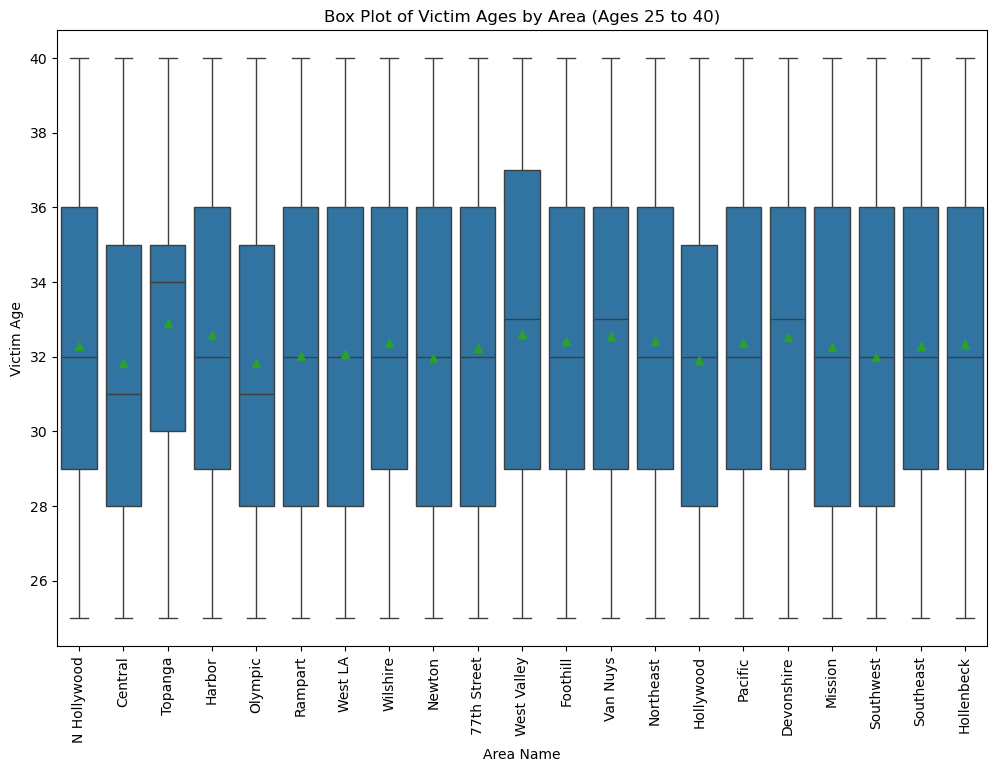

In [48]:
# Filter the dataset to include only records with victim ages between 25 and 40
filtered_data = df[(df['Vict Age'] >= 25) & (df['Vict Age'] <= 40)]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='AREA NAME', y='Vict Age',showmeans =True, data=filtered_data)
plt.xticks(rotation=90)
plt.title("Box Plot of Victim Ages by Area (Ages 25 to 40)")
plt.xlabel("Area Name")
plt.ylabel("Victim Age")
plt.show()

Code 624 Mean 39.969629223436115 Median 38.0
Code 330 Mean 37.846459717138856 Median 35.0
Code 354 Mean 41.89042558872217 Median 38.0
Code 440 Mean 39.32033157326974 Median 36.0
Code 740 Mean 41.66630880959899 Median 39.0
Code 230 Mean 38.23603962943901 Median 36.0
Code 331 Mean 42.70732057073206 Median 40.0
Code 626 Mean 35.064226871764966 Median 33.0
Code 310 Mean 48.270548765875866 Median 46.0
Code 341 Mean 40.73607476635514 Median 37.0


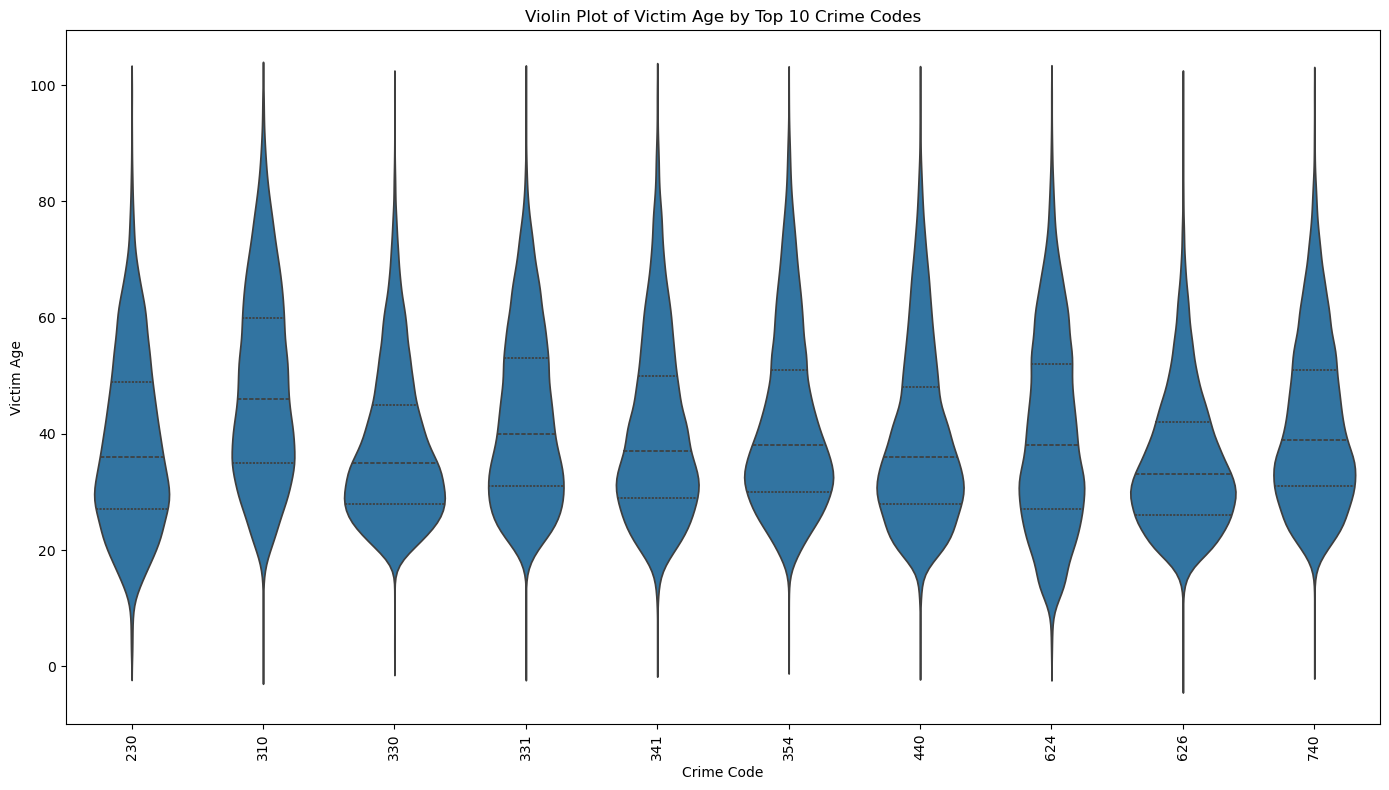

In [49]:
# Calculate the top 10 most frequent Crime Codes
top_10_crime_codes = df['Crm Cd'].value_counts().head(10).index.tolist()

# Filter the dataset for the top 10 Crime Codes
filtered_data = df[df['Crm Cd'].isin(top_10_crime_codes)]

# Create a violin plot
plt.figure(figsize=(14, 8))
ax = sns.violinplot(x='Crm Cd', y='Vict Age', data=filtered_data, inner="quart")
plt.xticks(rotation=90)
plt.title("Violin Plot of Victim Age by Top 10 Crime Codes")
plt.xlabel("Crime Code")
plt.ylabel("Victim Age")

# Create a legend for mean and median
legend_labels = []

for crime_code in top_10_crime_codes:
    mean_value = filtered_data[filtered_data['Crm Cd'] == crime_code]['Vict Age'].mean()
    median_value = filtered_data[filtered_data['Crm Cd'] == crime_code]['Vict Age'].median()
    print("Code" ,crime_code, "Mean",mean_value, "Median",median_value)


# Display the legend
# plt.legend(legend_labels, title="Statistics", loc="upper left", ncol=3)
# plt.legend(labels=legend_labels, title="Statistics", loc="upper left", ncol=3)
# plt.ylim(0, 150)
plt.tight_layout()
plt.show()

/var/folders/h0/_lb47hws0_j_3m6fx56cj_6h0000gn/T/ipykernel_87678/4071109892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Vict Descent', y='Vict Age', showmeans=True, palette='viridis')


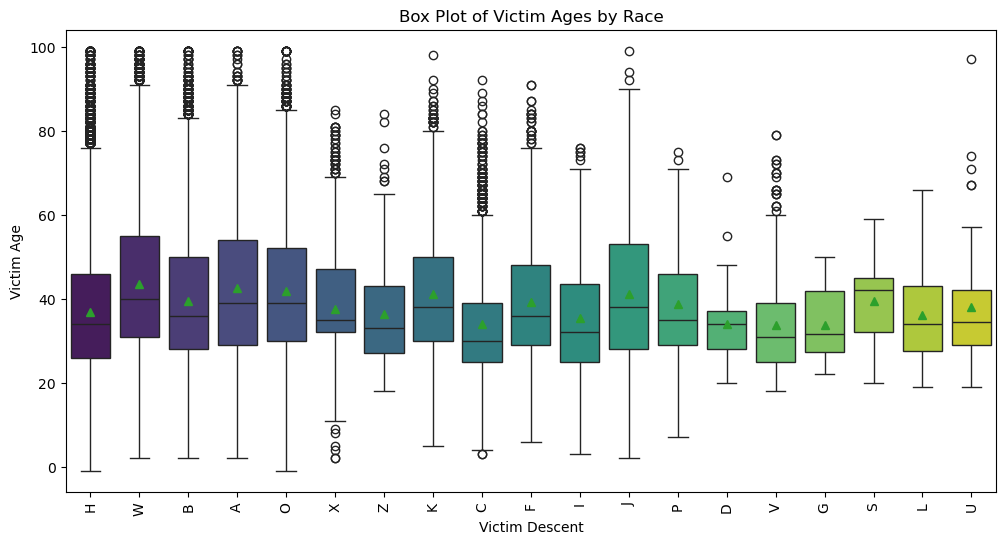

In [50]:
# Create a box plot for victim ages by area
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Vict Descent', y='Vict Age', showmeans=True, palette='viridis')
plt.title("Box Plot of Victim Ages by Race")
plt.xlabel("Victim Descent")
plt.ylabel("Victim Age")
plt.xticks(rotation=90)
plt.show()

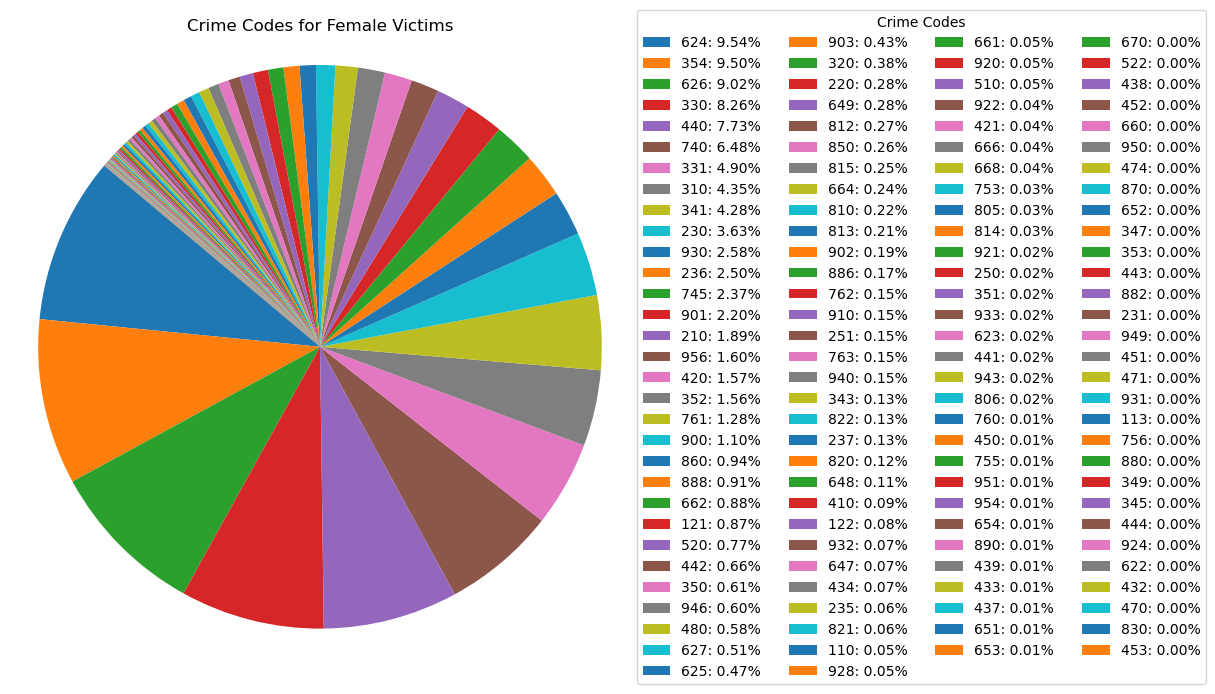

In [51]:
# Filter data for female victims
female_victims = df[df['Vict Sex'] == 'F']

# Count the occurrences of each crime code for female victims
crime_counts_female = female_victims['Crm Cd'].value_counts()
percentages = [(count / len(female_victims)) * 100 for count in crime_counts_female]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(crime_counts_female, labels=None, autopct='', startangle=140)
plt.title("Crime Codes for Female Victims")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Create a legend with crime codes
# plt.legend(crime_counts_female.index, title="Crime Codes", loc="center left", bbox_to_anchor=(1, 0.5), ncol=4)
legend_labels = [f"{code}: {percent:.2f}%" for code, percent in zip(crime_counts_female.index, percentages)]
plt.legend(legend_labels, title="Crime Codes", loc="center left", bbox_to_anchor=(1, 0.5), ncol=4)

# plt.legend(crime_counts_female.index, title="Crime Codes", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

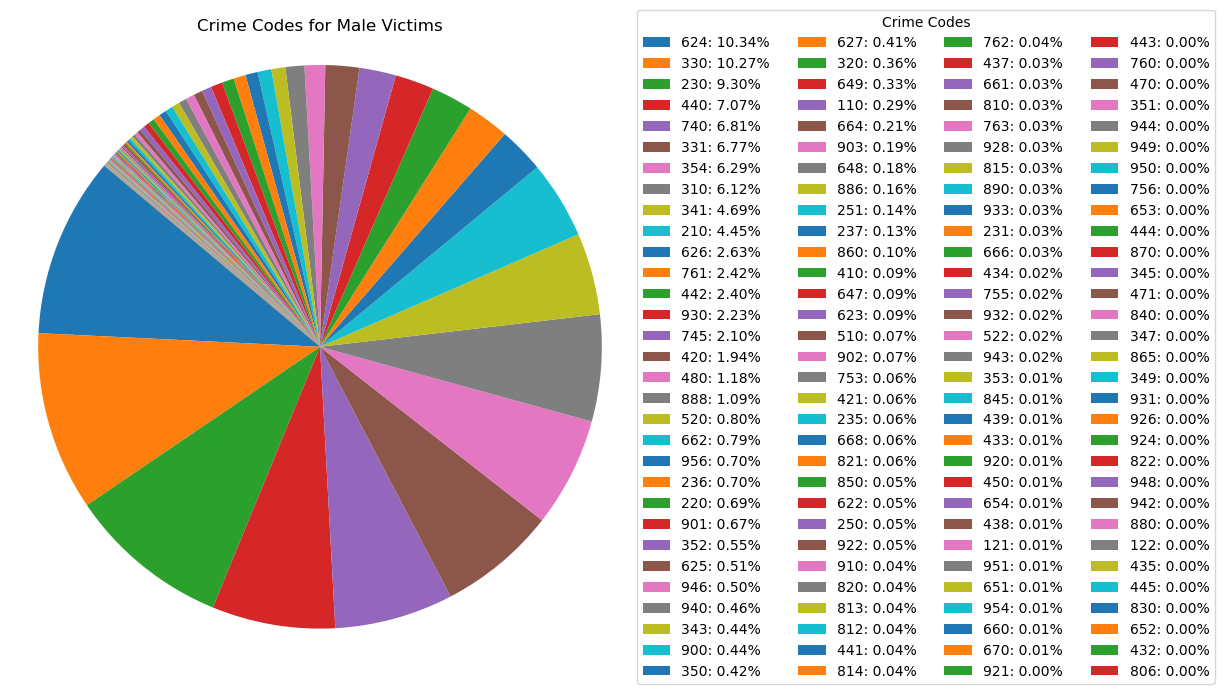

In [52]:
# Filter data for female victims
male_victims = df[df['Vict Sex'] == 'M']

# Count the occurrences of each crime code for female victims
crime_counts_male = male_victims['Crm Cd'].value_counts()
percentages = [(count / len(male_victims)) * 100 for count in crime_counts_male]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(crime_counts_male, labels=None, autopct='', startangle=140)
plt.title("Crime Codes for Male Victims")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Create a legend with crime codes
# plt.legend(crime_counts_female.index, title="Crime Codes", loc="center left", bbox_to_anchor=(1, 0.5), ncol=4)
legend_labels = [f"{code}: {percent:.2f}%" for code, percent in zip(crime_counts_male.index, percentages)]
plt.legend(legend_labels, title="Crime Codes", loc="center left", bbox_to_anchor=(1, 0.5), ncol=4)

# plt.legend(crime_counts_female.index, title="Crime Codes", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [53]:
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H:%M')

# Define time intervals
intervals = [(pd.Timestamp('00:01:00').time(), pd.Timestamp('06:00:00').time()),
             (pd.Timestamp('06:01:00').time(), pd.Timestamp('12:00:00').time()),
             (pd.Timestamp('12:01:00').time(), pd.Timestamp('18:00:00').time()),
             (pd.Timestamp('18:01:00').time(), pd.Timestamp('23:59:59').time())]

# Create labels for the intervals
labels = ['00:01-06:00', '06:01-12:00', '12:01-18:00', '18:01-24:00']

# Extract the time component (hours and minutes)
df['Time'] = df['TIME OCC'].dt.time

# Define a custom categorization function
def categorize_time(time):
    for i, interval in enumerate(intervals):
        if interval[0] <= time <= interval[1]:
            return labels[i]
    return None

# Apply the custom categorization function to create the 'Time Interval' column
df['Time Interval'] = df['Time'].apply(categorize_time)

# Count the number of occurrences in each interval
crime_counts = df['Time Interval'].value_counts().reindex(labels, fill_value=0)

# Display the results
print(crime_counts)

Time Interval
00:01-06:00    37678
06:01-12:00    56614
12:01-18:00    75850
18:01-24:00    68131
Name: count, dtype: int64


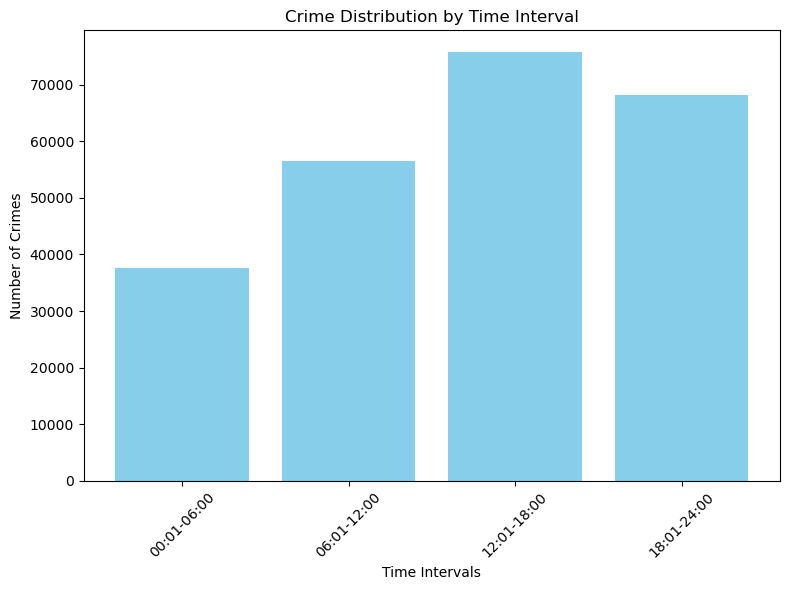

In [54]:
# Create a new figure with a specified size (8 units wide and 6 units tall)
plt.figure(figsize=(8, 6))

# Create a bar plot with labels and crime counts, using a sky blue color
plt.bar(labels, crime_counts, color='skyblue')

# Label the x-axis as 'Time Intervals' and y-axis as 'Number of Crimes'
plt.xlabel('Time Intervals')
plt.ylabel('Number of Crimes')

# Set the title
plt.title('Crime Distribution by Time Interval')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [55]:
#Check the shape of the data frame to determine the number of rows and columns
df.shape

(238273, 23)

## Data Cleaning Extension - 1: Handle Outliers ✅

In [56]:
# Create Function To Clean Outliers Using IQR Method
def handle_outliers(df):
    for col in df.select_dtypes(include='number').columns:
            # Identify Quartiles
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
    
            # Identify Upper And Lower Limit
            lower_lim = Q1 - 1.5 * IQR
            upper_lim = Q3 + 1.5 * IQR
    
            # Drop All Values Outside Lower/Upper Limit
            df = df[(df[col] >= lower_lim) & (df[col] <= upper_lim)]

    return df

df = handle_outliers(df)

In [57]:
df.shape

(236815, 23)

## Data Cleaning Extension - 2: Examine Data Balance ⚖️

In [58]:
df['Status'].value_counts()

Status
IC    189334
AO     28348
AA     17763
JA       776
JO       592
CC         2
Name: count, dtype: Int64

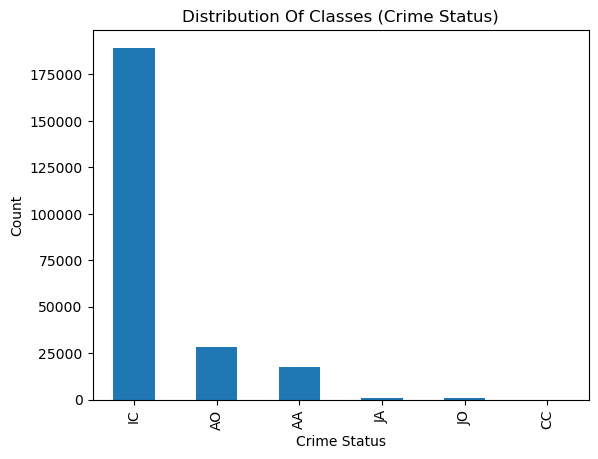

In [59]:
df['Status'].value_counts().plot(kind = 'bar')
plt.title("Distribution Of Classes (Crime Status)")
plt.xlabel("Crime Status")
plt.ylabel("Count")
plt.show()

* Even though the data is heavily skewed, there is no need to upsample/downsample as this imbalance is representative of real-world data. Most crimes are still currently under investigation (IC). 

In [60]:
# Remove 'CC' Column Since It Accounts For Such A Small Percentage Of Data
df = df.drop(df[df['Status'] == 'CC'].index)
df['Status'].value_counts()

Status
IC    189334
AO     28348
AA     17763
JA       776
JO       592
Name: count, dtype: Int64

In [61]:
df.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Target,Year,Time,Time Interval
DR_NO,,,,,,,,,,,,,,,,,,,,,
230106843,2023-02-12,2023-02-11,1900-01-01 16:30:00,1,Central,191,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0913 0344 0603,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",0.0,No weapons identified,IC,Invest Cont,No Arrest,2023,16:30:00,12:01-18:00
231515059,2023-09-19,2023-09-19,1900-01-01 10:30:00,15,N Hollywood,1549,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1309 0421 0913 0334,...,101.0,STREET,102.0,HAND GUN,IC,Invest Cont,No Arrest,2023,10:30:00,06:01-12:00
230110347,2023-04-11,2023-04-10,1900-01-01 08:16:00,1,Central,192,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0344 1822,...,108.0,PARKING LOT,0.0,No weapons identified,IC,Invest Cont,No Arrest,2023,08:16:00,06:01-12:00
230618504,2023-12-01,2023-12-01,1900-01-01 01:10:00,6,Hollywood,639,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,1202 1814 0913 0319 2001 1813 2000 0400 0448,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,No Arrest,2023,01:10:00,00:01-06:00
242105761,2024-02-13,2023-12-17,1900-01-01 07:30:00,21,Topanga,2149,1,210,ROBBERY,2000 0913 1814 0344 0329 0400 1414,...,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,No Arrest,2023,07:30:00,06:01-12:00


## Feature Engineering 🛠️

Text(0, 0.5, 'Count')

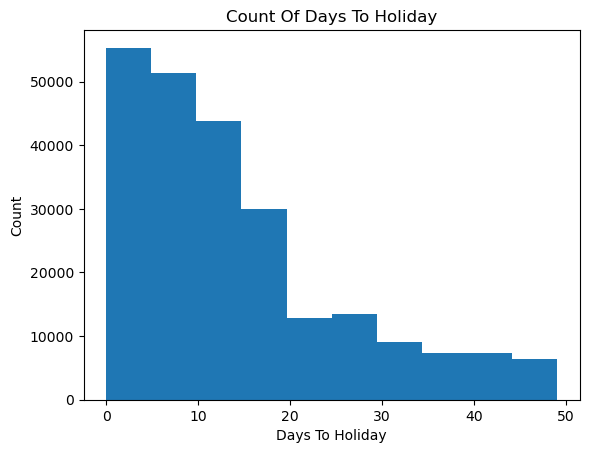

In [62]:
# Days To Holiday Column
def get_us_holidays(year):
    # Fixed-date holidays
    holidays = [
        datetime(year, 1, 1),    # New Year's Day
        datetime(year, 7, 4),    # Independence Day
        datetime(year, 11, 11),  # Veterans Day
        datetime(year, 12, 25),  # Christmas Day
    ]
    
    # Floating holidays
    # Martin Luther King Jr. Day (3rd Monday of January)
    mlk = datetime(year, 1, 1) + timedelta(days=(14 - datetime(year, 1, 1).weekday()) % 7 + 14)
    holidays.append(mlk)
    
    # Presidents' Day (3rd Monday of February)
    presidents_day = datetime(year, 2, 1) + timedelta(days=(14 - datetime(year, 2, 1).weekday()) % 7 + 14)
    holidays.append(presidents_day)
    
    # Memorial Day (last Monday of May)
    memorial_day = datetime(year, 5, 31)
    while memorial_day.weekday() != 0:
        memorial_day -= timedelta(days=1)
    holidays.append(memorial_day)
    
    # Labor Day (1st Monday of September)
    labor_day = datetime(year, 9, 1)
    while labor_day.weekday() != 0:
        labor_day += timedelta(days=1)
    holidays.append(labor_day)
    
    # Columbus Day (2nd Monday of October)
    columbus_day = datetime(year, 10, 1) + timedelta(days=(7 - datetime(year, 10, 1).weekday()) % 7 + 7)
    holidays.append(columbus_day)
    
    # Thanksgiving Day (4th Thursday of November)
    thanksgiving = datetime(year, 11, 1)
    thursdays = 0
    while thursdays < 4:
        if thanksgiving.weekday() == 3:
            thursdays += 1
        thanksgiving += timedelta(days=1)
    holidays.append(thanksgiving - timedelta(days=1))  # because it overshoots
    
    return holidays

# Ensure DATE OCC is datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Calculate Days_To_Holiday
def days_to_nearest_holiday(date):
    year = date.year
    holidays = get_us_holidays(year)
    return min(abs((date - h).days) for h in holidays)

df['Days_To_Holiday'] = df['DATE OCC'].apply(days_to_nearest_holiday)

plt.hist(df['Days_To_Holiday'])
plt.title("Count Of Days To Holiday")
plt.xlabel("Days To Holiday")
plt.ylabel("Count")

In [63]:
# Seperate Date, Time, Month into Individual Columns
# Reported Date
df['RPTD_Year'] = df['Date Rptd'].dt.year
df['RPTD_Month'] = df['Date Rptd'].dt.month
df['RPTD_Day'] = df['Date Rptd'].dt.day

# Date Occured
df['OCC_Year'] = df['DATE OCC'].dt.year
df['OCC_Month'] = df['DATE OCC'].dt.month
df['OCC_Date'] = df['DATE OCC'].dt.day

# Time Occured
df['OCC_Hour'] = df['TIME OCC'].dt.hour
df['OCC_Minute'] = df['TIME OCC'].dt.minute
df['OCC_Second'] = df['TIME OCC'].dt.second

# Time Of Day Occured
def map_time_of_day(hour):
    if 0 <= hour < 5:
        return 'Late Night'
    elif 5 <= hour < 8:
        return 'Early Morning'
    elif 8 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['OCC_TimeOfDay'] = df['OCC_Hour'].apply(map_time_of_day)

# Drop Parsed Columns
df.drop(['Date Rptd', 'DATE OCC', 'TIME OCC', 'Time', 'Year'], axis = 1, inplace = True)

## Rename Columns 📝

In [64]:
df.rename(columns={
    'AREA': 'area_code',
    'AREA NAME': 'area_name',
    'Rpt Dist No': 'reporting_district',
    'Part 1-2': 'crime_part',
    'Crm Cd': 'crime_code',
    'Crm Cd Desc': 'crime_description',
    'Mocodes': 'mo_codes',
    'Vict Age': 'victim_age',
    'Vict Sex': 'victim_sex',
    'Vict Descent': 'victim_descent',
    'Premis Cd': 'premise_code',
    'Premis Desc': 'premise_description',
    'Weapon Used Cd': 'weapon_code',
    'Weapon Desc': 'weapon_description',
    'Status Desc': 'status_description',
    'Target': 'arrest_type',
    'Time Interval': 'occ_time_interval',
    'Days_To_Holiday': 'days_to_holiday',
    'RPTD_Year': 'report_year',
    'RPTD_Month': 'report_month',
    'RPTD_Day': 'report_day',
    'OCC_Year': 'occurrence_year',
    'OCC_Month': 'occurrence_month',
    'OCC_Date': 'occurrence_day',
    'OCC_Hour': 'occurrence_hour',
    'OCC_Minute': 'occurrence_minute',
    'OCC_Second': 'occurrence_second',
    'OCC_TimeOfDay': 'occurrence_time_of_day',
}, inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236813 entries, 230106843 to 240309674
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   area_code               236813 non-null  int64  
 1   area_name               236813 non-null  string 
 2   reporting_district      236813 non-null  int64  
 3   crime_part              236813 non-null  int64  
 4   crime_code              236813 non-null  int64  
 5   crime_description       236813 non-null  string 
 6   mo_codes                236813 non-null  string 
 7   victim_age              236813 non-null  int64  
 8   victim_sex              236813 non-null  string 
 9   victim_descent          236813 non-null  string 
 10  premise_code            236813 non-null  float64
 11  premise_description     236813 non-null  string 
 12  weapon_code             236813 non-null  float64
 13  weapon_description      236813 non-null  string 
 14  Status        

## Mo_Codes Handling 🚨
* We can see below that `mo_codes` has a large number of unique values. This will cause pd.get_dummies() (One-Hot Encoding) fail. There are a few things we can do here:
    * Create the count of `mo_codes`
    * Top ***k*** binary flags (whether common flags are present or not (top ***k*** flags)
    * Behavioral Clustering
    * Sequence Embedding

In [66]:
# Count The Number Mo_Codes
df['mo_code_count'] = df['mo_codes'].apply(lambda x: len(x.split()))

# Top K Binary Flags
from collections import Counter

def binary_flags(df, k=20):
    # Step 1: Flatten all codes into one list
    all_mo_lists = df['mo_codes'].dropna().apply(lambda x: str(x).split())
    flat_list = [code for sublist in all_mo_lists for code in sublist]
    print(flat_list)

    # Step 2: Count frequency of each code
    mo_counts = Counter(flat_list)

    # Step 3: Get top K codes
    top_k_codes = [code for code, _ in mo_counts.most_common(k)]

    # Step 4: Create binary flags
    for code in top_k_codes:
        df[f'mo_{code}'] = df['mo_codes'].apply(lambda x: int(code in str(x).split()))

    return df

df = binary_flags(df, k=20)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



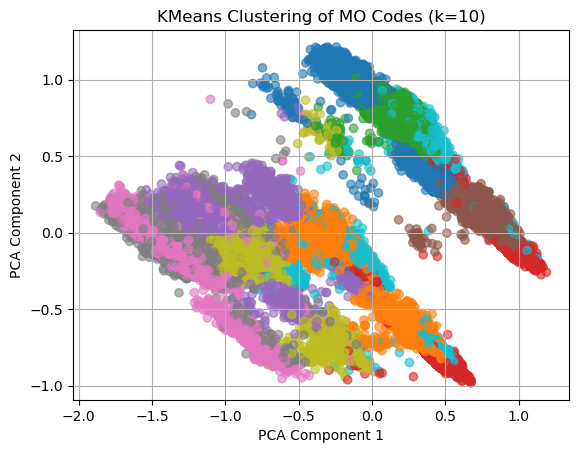

In [67]:
# Cluster Codes
def cluster(k = 5):
    vectorizer = CountVectorizer(analyzer = str.split) # Tokenizes on Each Mo_Code Sep by ' '
    x_mo = vectorizer.fit_transform(df['mo_codes']) # Learn the Vocabulary 

    kmeans = KMeans(n_clusters = k, random_state = 42) # Assign Codes To Cluster
    df['mo_cluster'] = kmeans.fit_predict(x_mo) # Assign Clusters To Row on df

    pca = PCA(n_components = 2) # Dimensionality Reduction for visualization
    x_pca = pca.fit_transform(x_mo.toarray())

    # Scatter Plot Of Clusters
    plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df['mo_cluster'], cmap='tab10', alpha=0.6)
    plt.title(f"KMeans Clustering of MO Codes (k={k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()

cluster(10)

## Encode Columns 🧮

In [68]:
for col in df.select_dtypes(include=['object', 'string']):
    print(f"{col}: {df[col].nunique()} unique values")

area_name: 21 unique values
crime_description: 131 unique values
mo_codes: 94063 unique values
victim_sex: 2 unique values
victim_descent: 19 unique values
premise_description: 292 unique values
weapon_description: 78 unique values
Status: 5 unique values
status_description: 5 unique values
arrest_type: 2 unique values
occ_time_interval: 4 unique values
occurrence_time_of_day: 6 unique values


In [69]:
def encode_columns(df):
    categorical_cols = df.select_dtypes(include=['object', 'string']).columns.tolist()

    for col in ['mo_codes', 'Status']: # Ignore These Two Cols For Further Processing
        if col in categorical_cols:
            categorical_cols.remove(col)
    
    df = pd.get_dummies(df, columns=categorical_cols) # One-Hot Encode Features

    # Label Encode Status
    le = LabelEncoder()
    df['Status'] = le.fit_transform(df['Status'])
    
    return df
    
df = encode_columns(df)

## Reassign Target To Last Column 🔁

In [73]:
# Move Target Column To Last Position
df = df.assign(Status=df.pop('Status'))

In [74]:
# View Cleaned DF
df.head()

,area_code,reporting_district,crime_part,crime_code,mo_codes,victim_age,premise_code,weapon_code,days_to_holiday,report_year,...,occ_time_interval_06:01-12:00,occ_time_interval_12:01-18:00,occ_time_interval_18:01-24:00,occurrence_time_of_day_Afternoon,occurrence_time_of_day_Early Morning,occurrence_time_of_day_Evening,occurrence_time_of_day_Late Night,occurrence_time_of_day_Morning,occurrence_time_of_day_Night,Status
DR_NO,,,,,,,,,,,,,,,,,,,,,
230106843,1,191,1,440,0913 0344 0603,48,502.0,0.0,9,2023,...,False,True,False,True,False,False,False,False,False,2
231515059,15,1549,1,230,1309 0421 0913 0334,36,101.0,102.0,15,2023,...,True,False,False,False,False,False,False,True,False,2
230110347,1,192,1,331,0344 1822,25,108.0,0.0,49,2023,...,True,False,False,False,False,False,False,True,False,2
230618504,6,639,2,626,1202 1814 0913 0319 2001 1813 2000 0400 0448,65,502.0,400.0,8,2023,...,False,False,False,False,False,False,True,False,False,1
242105761,21,2149,1,210,2000 0913 1814 0344 0329 0400 1414,31,501.0,400.0,8,2024,...,True,False,False,False,True,False,False,False,False,1


In [ ]:
# Save CSV
df.to_csv("../Data/Cleaned_Dataset.csv")